<a href="https://colab.research.google.com/github/Sahel-Eskandar/Forcasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib pandas-datareader yfinance statsmodels

[*********************100%***********************]  1 of 1 completed
AIC:  963.3646571558598
BIC:  973.259609255504
RMSE:  4.380984919997412


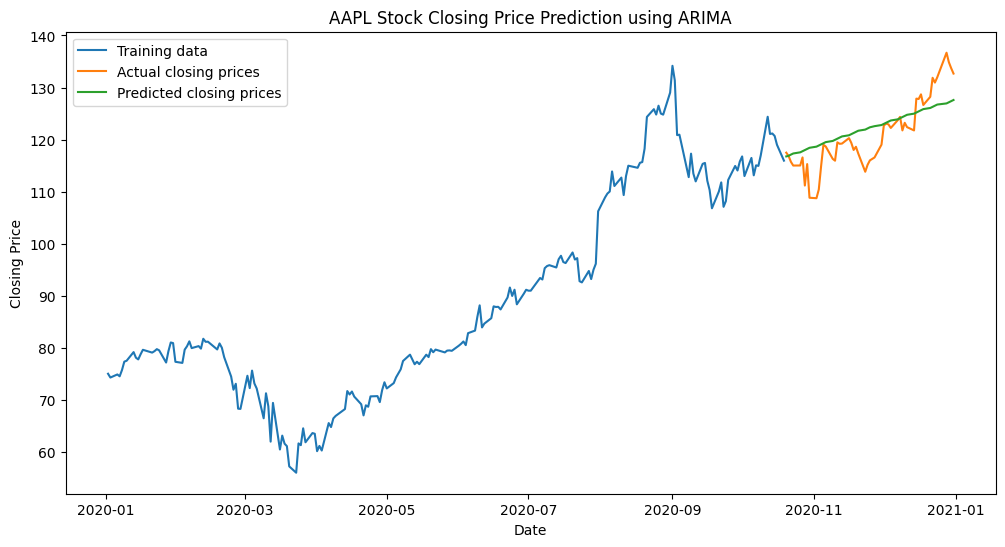

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Configure Yahoo Finance data source
yf.pdr_override()

# Download historical stock data
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2021-01-01"
stock_data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)

# Select the closing prices
closing_prices = stock_data["Close"]

# Split the data into training and testing sets
train_data = closing_prices[:int(len(closing_prices) * 0.8)]
test_data = closing_prices[int(len(closing_prices) * 0.8):]

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 2, 1))
model_fit = model.fit()

# Print AIC and BIC values
print("AIC: ", model_fit.aic)
print("BIC: ", model_fit.bic)

# Forecast the stock prices using the ARIMA model
forecast = model_fit.forecast(steps=len(test_data))

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_data, forecast))
print("RMSE: ", rmse)

# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training data")
plt.plot(test_data, label="Actual closing prices")
plt.plot(test_data.index, forecast, label="Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{ticker} Stock Closing Price Prediction using ARIMA")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
Error fitting ARIMA model with order (2, 3, 2)
Best ARIMA order: (3, 2, 4)
AIC:  956.5203843067774
BIC:  982.9069232391616
RMSE:  4.357636549034368


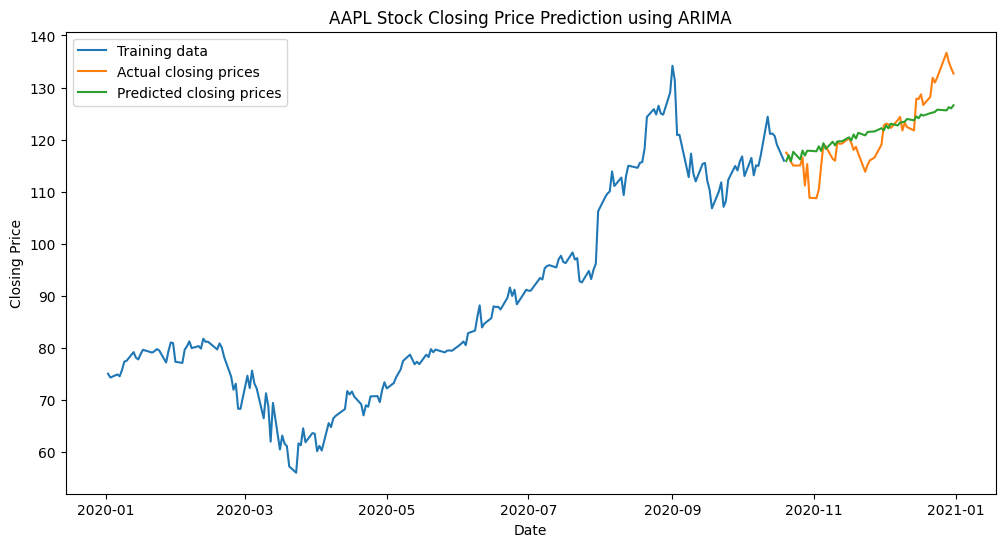

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Configure Yahoo Finance data source
yf.pdr_override()

# Download historical stock data
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2021-01-01"
stock_data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)

# Select the closing prices
closing_prices = stock_data["Close"]

# Split the data into training and testing sets
train_data = closing_prices[:int(len(closing_prices) * 0.8)]
test_data = closing_prices[int(len(closing_prices) * 0.8):]

# Grid search to find the optimal ARIMA parameters
p_values = range(0, 5)
d_values = range(2, 5)
q_values = range(0, 5)
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

best_aic = float("inf")
best_order = None
best_model = None

for order in pdq_combinations:
    try:
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
            best_model = model_fit
    except Exception as e:
        print(f"Error fitting ARIMA model with order {order}")

print(f"Best ARIMA order: {best_order}")
print("AIC: ", best_aic)
print("BIC: ", best_model.bic)

# Forecast the stock prices using the best ARIMA model
forecast = best_model.forecast(steps=len(test_data))

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_data, forecast))
print("RMSE: ", rmse)

# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training data")
plt.plot(test_data, label="Actual closing prices")
plt.plot(test_data.index, forecast, label="Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{ticker} Stock Closing Price Prediction using ARIMA")
plt.legend()
plt.show()


In [14]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Configure Yahoo Finance data source
yf.pdr_override()

# Download historical stock data
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2021-01-01"
stock_data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)

# Select the closing prices
closing_prices = stock_data["Close"]

# Preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:, :]
test_data_index = closing_prices[train_size:].index

# Function to create time series dataset for LSTM
def create_dataset(dataset, window_size=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - window_size - 1):
        data_x.append(dataset[i:(i + window_size), 0])
        data_y.append(dataset[i + window_size, 0])
    return np.array(data_x), np.array(data_y)

# Create the time series dataset for LSTM
window_size = 5
train_x, train_y = create_dataset(train_data, window_size)
test_x, test_y = create_dataset(test_data, window_size)

# Reshape the input to be [samples, time steps, features]
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=0)

# Make predictions using the LSTM model
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

# Invert the predictions
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# Calculate the root mean squared error (RMSE) for LSTM
test_rmse = sqrt(mean_squared_error(test_y[0], test_predict[:, 0]))
print("LSTM Test RMSE: ", test_rmse)


[*********************100%***********************]  1 of 1 completed
2/2 [==============================] - 0s 8ms/step
LSTM Test RMSE:  2.7113908479025053


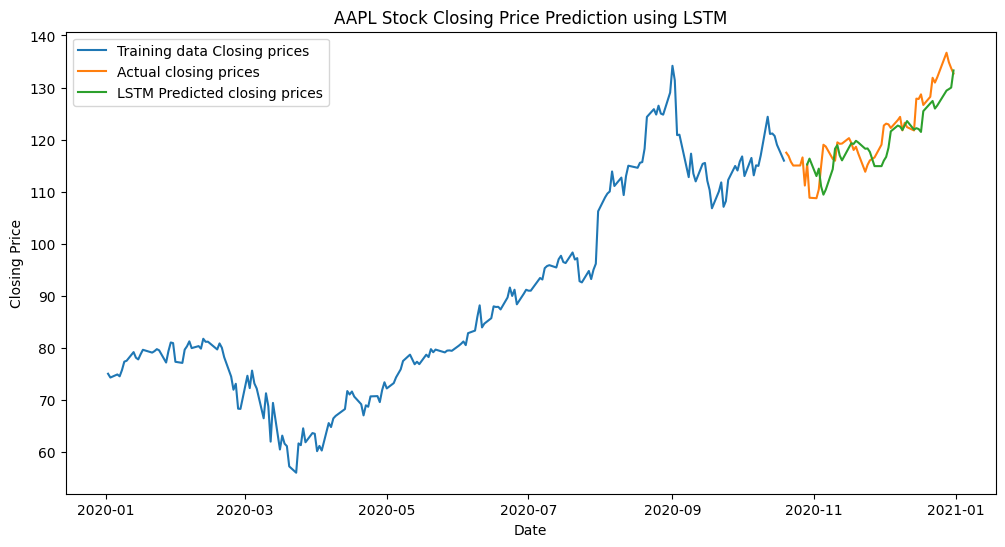

In [40]:
# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(closing_prices[:-len(test_data_index)], label="Training data Closing prices")
plt.plot(closing_prices[-len(test_data_index):], label="Actual closing prices")
plt.plot(test_data_index[7:], test_predict[:-1], label="LSTM Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{ticker} Stock Closing Price Prediction using LSTM")
plt.legend()
plt.show()